In [1]:
import import_ipynb
import player as P
import pygame
import sys
import time

pygame 2.6.1 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


## PLAY AGAINST

In [2]:
def playoff(bot_white,bot_black):
    WIDTH, HEIGHT = 600, 600
    GRID_SIZE = 8
    CELL_SIZE = WIDTH // GRID_SIZE
    BLACK = (0, 0, 0)
    WHITE = (255, 255, 255)
    GREEN = (0, 128, 0)
    # Initialize the game board
    board = [[0 for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]
    board[3][4] = board[4][3] = 2  # White
    board[3][3] = board[4][4] = 1  # Black
    # Current player (1 for White, 2 for Black)
    # Initialize Pygame
    # # Create the game window

    # pygame.init()
    # pygame.font.init() 
    # my_font = pygame.font.SysFont('Comic Sans MS', 10)

    # screen = pygame.display.set_mode((WIDTH, HEIGHT))
    # pygame.display.set_caption("8x8 Othello")

    # def draw_board():
    #     screen.fill(GREEN)
    #     for x in range(GRID_SIZE):
    #         for y in range(GRID_SIZE):
    #             pygame.draw.rect(screen, BLACK, (x*CELL_SIZE, y*CELL_SIZE, CELL_SIZE, CELL_SIZE), 1)
    #             if board[y][x] == 1:
    #                 pygame.draw.circle(screen, WHITE, (x*CELL_SIZE + CELL_SIZE//2, y*CELL_SIZE + CELL_SIZE//2), CELL_SIZE//2 - 5)
    #             elif board[y][x] == 2:
    #                 pygame.draw.circle(screen, BLACK, (x*CELL_SIZE + CELL_SIZE//2, y*CELL_SIZE + CELL_SIZE//2), CELL_SIZE//2 - 5)

    flag = 1
    current_player = 2
    while flag:
        
        flag = 0
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                if P.is_valid_move(x,y,board,current_player): flag=1

        if current_player == 1 and flag:
            x,y = bot_white.get_move(board,current_player)    
            if P.is_valid_move(x, y,board,current_player):
                P.make_move(x,y,board,current_player)
            current_player = 2
        
        elif current_player == 2 and flag:
            
            grid_x,grid_y = bot_black.get_move(board,current_player)
            if P.is_valid_move(grid_x, grid_y,board,current_player):
                P.make_move(grid_x, grid_y,board,current_player)
                current_player = 1

        # Quit = False
        # for event in pygame.event.get():
        #     if event.type == pygame.QUIT:
        #         Quit = True    
        # if(Quit): break

        if not flag:
            wins = P.decide_winner(board,current_player)
     
    #     draw_board()
    #     pygame.display.flip()
    # pygame.quit()
    return wins



In [3]:
mcts1 = P.MCTSPlayer(explorationFactor=1,rollouts=300,selectionDepth=2)
mcts15 = P.MCTSPlayer(explorationFactor=1.5,rollouts=300,selectionDepth=2)
alpha2 = P.AlphaBetaPlayer(depth = 2)
alpha3 = P.AlphaBetaPlayer(depth = 3)
rando = P.RandomPlayer()

In [4]:
players = [mcts1,mcts15,alpha2,alpha3,rando]
elo = [1200 for x in players]

def match(idxWhite,idxBlack):
    E_w = 1/(1 + 10**((elo[idxBlack] - elo[idxWhite])/400))
    E_b = 1/(1 + 10**((elo[idxWhite] - elo[idxBlack])/400))

    blackWin = playoff(bot_white = players[idxWhite],bot_black = players[idxBlack])

    if(blackWin):
        elo[idxBlack] = elo[idxBlack] + 32*(1 - E_w)
        elo[idxWhite] = elo[idxWhite] + 32*(0 - E_b)
    else:
        elo[idxBlack] = elo[idxBlack] + 32*(0 - E_w)
        elo[idxWhite] = elo[idxWhite] + 32*(1 - E_b)

In [5]:
print(elo)

[1200, 1200, 1200, 1200, 1200]


In [6]:
import matplotlib.pyplot as plt
# players = [mcts1,mcts15,alpha2,alpha3,rando]
# elo = [1200 for x in players]

# n = len(elo)
# print(n)
# for x in range(5):
#     for i in range(n):
#         for j in range(n):
#             if i == j : continue
#             match(i,j)
#             print(".",end="")
#     print(elo)

# plt.barh([
#      "MCTS Exploration 1",
#      "MCTS Exploration 1.5",
#      "3 ply alpha-beta",
#      "2 ply alpha-beta",
#      "random bot"
#      ],elo)

# plt.show()

5
....................[1090.5993959198288, 1158.9645325964623, 1125.3419501272263, 1315.386570894453, 1309.70755046203]
....................[966.3551575411298, 1112.6712336238795, 978.7529019747046, 1474.9470552018367, 1467.2736516584494]
....................[753.2847299171192, 1090.895534908969, 848.5554426210233, 1628.527244456415, 1678.7370480964732]
....................[554.1942657783545, 1044.6896964650646, 714.6352611402681, 1850.9616935026736, 1835.5190831136392]


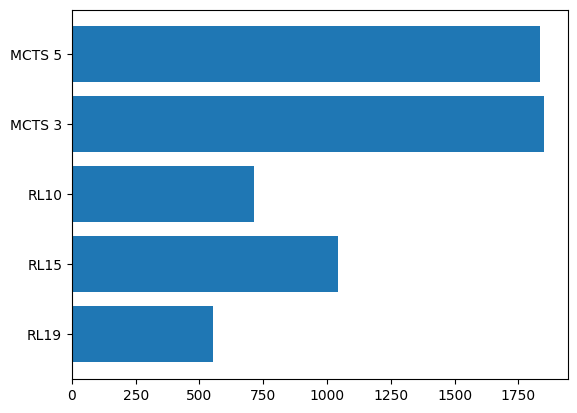

In [7]:
import torch

RLMCTS19 = P.RLMCTSPlayer(timed = True,timeLimit = 3.0)
RLMCTS15 = P.RLMCTSPlayer(timed = True,timeLimit = 3.0)
RLMCTS10 = P.RLMCTSPlayer(timed = True,timeLimit = 3.0)

RLMCTS19.policy_value_network.load_state_dict(torch.load('RLMCTS_5SEC_1.4/checkpoint19.pth', map_location=torch.device("cpu"),weights_only=True))
RLMCTS15.policy_value_network.load_state_dict(torch.load('RLMCTS_5SEC_1.4/checkpoint15.pth', map_location=torch.device("cpu"),weights_only=True))
RLMCTS10.policy_value_network.load_state_dict(torch.load('RLMCTS_5SEC_1.4/checkpoint10.pth', map_location=torch.device("cpu"),weights_only=True))

mcts3 = P.MCTSPlayer(explorationFactor=1.5,timed = True,timeLimit = 3.0,selectionDepth=2)
mcts5 = P.MCTSPlayer(explorationFactor=1.5,timed = True,timeLimit = 5.0,selectionDepth=2)

players = [RLMCTS10,RLMCTS15,RLMCTS19,mcts3,mcts5]
elo = [1200 for x in range(len(players))]

n = len(elo)
print(n)
for x in range(4):
    for i in range(n):
        for j in range(n):
            if i == j : continue
            match(i,j)
            print(".",end="")
    print(elo)

plt.barh([
     "RL19",
     "RL15",
     "RL10",
     "MCTS 3",
     "MCTS 5"
     ],elo)

plt.show()





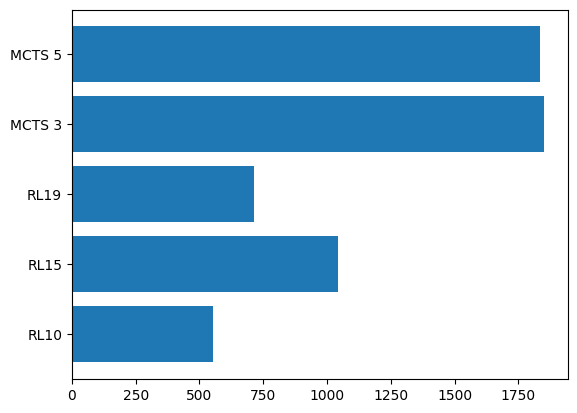

In [8]:
plt.barh([
     "RL10",
     "RL15",
     "RL19",
     "MCTS 3",
     "MCTS 5"
     ],elo)

plt.show()